In [1]:
import os
import sys
root_path = os.path.abspath("../../../")
if root_path not in sys.path:
    sys.path.append(root_path)

from Util.Util import DataUtil

(x_train, y_train), (x_cv, y_cv) = DataUtil.gen_noisy_linear(one_hot=False)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def draw_losses(*models):
    plt.figure()
    for nn in models:
        name = str(nn)
        el, csl = nn.log["epoch_loss"], nn.log["cv_snapshot_loss"]
        ee_base = np.arange(len(el))
        cse_base = np.linspace(0, len(el) - 1, len(csl))
        plt.plot(ee_base, el, label="Train loss ({})".format(name))
        plt.plot(cse_base, csl, label="CV loss ({})".format(name))
        plt.legend()
    plt.show()

In [3]:
from Toolbox import DT2NN

sign_one_hot = DT2NN(x_train, y_train, x_cv, y_cv, activations=["sign", "one_hot"]).fit(snapshot_ratio=0)
sign_softmax = DT2NN(x_train, y_train, x_cv, y_cv, activations=["sign", "softmax"]).fit(snapshot_ratio=0)
tanh_softmax = DT2NN(x_train, y_train, x_cv, y_cv, activations=["tanh", "softmax"]).fit(snapshot_ratio=0)

Decision Tree performance
------------------------------------------------------------
acc  -  Train :      1.0   CV :    0.818
------------------------------------------------------------
Initial performance
------------------------------------------------------------
acc  -  Train :      1.0   CV :    0.818
------------------------------------------------------------
Epoch   32   Iter 1119   Snapshot   32 (acc)  -  Train :      1.0   CV :    0.818  -  Time Cost: 9.086591243743896
Decision Tree performance
------------------------------------------------------------
acc  -  Train :      1.0   CV : 0.817333
------------------------------------------------------------
Initial performance
------------------------------------------------------------
acc  -  Train :      1.0   CV : 0.817333
------------------------------------------------------------
Epoch   32   Iter 1119   Snapshot   32 (acc)  -  Train :      1.0   CV :    0.918  -  Time Cost: 13.918510675430298
Decision Tree performance

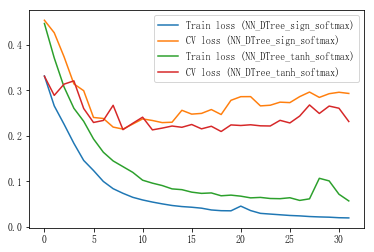

In [4]:
draw_losses(sign_softmax, tanh_softmax)